In [ ]:
# Tripplet loss -> calculating special characteristics space in which the similar images will have the long distance

# Contrasitive loss -> calculating the most different images with maximization by the special characteristic spaces


In [80]:
from keras.layers import (Input, Conv2D, Conv2DTranspose, MaxPooling2D,GlobalMaxPooling2D, BatchNormalization,
Flatten, Dropout, Dense, GlobalAveragePooling2D, Activation, LeakyReLU, Reshape)
from keras.losses import BinaryCrossentropy
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [20]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)/255
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [22]:
input = Input(shape=(28,28,1))

x = Conv2D(filters=16, kernel_size=(3,3), padding='same',activation='relu')(input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(3)(x)
x = BatchNormalization()(x)
output = Dense(10,activation='softmax')(x)

softmax_model = Model(input,output)

softmax_model.compile(
    loss='categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

softmax_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_21 (Ba  (None, 28, 28, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_22 (Ba  (None, 14, 14, 32)        128 

In [24]:
softmax_model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=500,epochs=10,verbose=1)

Epoch 1/10
120/120 [==============================] - 35s 289ms/step - loss: 0.6420 - accuracy: 0.9233 - val_loss: 0.5853 - val_accuracy: 0.9553
Epoch 2/10
120/120 [==============================] - 34s 285ms/step - loss: 0.5178 - accuracy: 0.9485 - val_loss: 0.4536 - val_accuracy: 0.9632
Epoch 3/10
120/120 [==============================] - 35s 288ms/step - loss: 0.4235 - accuracy: 0.9585 - val_loss: 0.3603 - val_accuracy: 0.9666
Epoch 4/10
120/120 [==============================] - 34s 283ms/step - loss: 0.3541 - accuracy: 0.9639 - val_loss: 0.3076 - val_accuracy: 0.9671
Epoch 5/10
120/120 [==============================] - 34s 285ms/step - loss: 0.3003 - accuracy: 0.9667 - val_loss: 0.2157 - val_accuracy: 0.9747
Epoch 6/10
120/120 [==============================] - 34s 286ms/step - loss: 0.2576 - accuracy: 0.9700 - val_loss: 0.1992 - val_accuracy: 0.9757
Epoch 7/10
120/120 [==============================] - 35s 292ms/step - loss: 0.2264 - accuracy: 0.9717 - val_loss: 0.1865 - val_ac

In [25]:
#!git clone https://github.com/4uiiurz1/keras-arcface.git

Cloning into 'keras-arcface'...
remote: Enumerating objects: 36, done.
remote: Total 36 (delta 0), reused 0 (delta 0), pack-reused 36
Receiving objects: 100% (36/36), 450.70 KiB | 1.02 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [53]:
import sys
sys.path.append('/tf/notebooks/AiLearning/NeuralNetworks/lesson-8/keras-arcface')
from metrics import ArcFace

In [54]:
!python -m site

sys.path = [
    '/tf/notebooks/AiLearning/NeuralNetworks/lesson-8',
    '/usr/lib/python311.zip',
    '/usr/lib/python3.11',
    '/usr/lib/python3.11/lib-dynload',
    '/usr/local/lib/python3.11/dist-packages',
    '/usr/lib/python3/dist-packages',
]
USER_BASE: '/root/.local' (exists)
USER_SITE: '/root/.local/lib/python3.11/site-packages' (doesn't exist)
ENABLE_USER_SITE: True


In [ ]:
# GAN

In [68]:

batch_size = 64
(x_train, _),(x_test, _) = keras.datasets.fashion_mnist.load_data()
x_all = np.concatenate([x_train,x_test])
x_all = x_all.astype('float32')/255
x_all = np.reshape(x_all,(-1,28,28,1))

dataset = tf.data.Dataset.from_tensor_slices(x_all)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

In [69]:
discriminator = keras.Sequential(
    [
    Input(shape = (28,28,1)),
    Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="same"),
    LeakyReLU(alpha=0.2),
    Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same"),
    LeakyReLU(alpha=0.2),
    GlobalMaxPooling2D(),
    Dense(1)
    ],
    name = "discriminator"
)

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 global_max_pooling2d_1 (Gl  (None, 128)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                     

In [75]:
latent_dim = 128

generator = Sequential(
    [
        Input(shape=(latent_dim,)),
        Dense(7*7*128),
        LeakyReLU(alpha=0.2),
        Reshape((7,7,128)),
        Conv2DTranspose(filters=128,kernel_size=(4,4),strides=(2,2),padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(filters=256,kernel_size=(4,4),strides=(2,2),padding="same"),
        LeakyReLU(alpha=0.2),
        Conv2D(filters=1,kernel_size=(7,7),activation="sigmoid",padding="same"),
    ],
    name='generator'
)

generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 256)       524544    
 Transpose)                                              

In [76]:
class Gan (Model):
    def __init__(self,discriminator,generator,latent_dim):
        super(Gan,self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self,dis_opt,gen_opt,loss_funct):
        super(Gan,self).compile()
        self.dis_opt=dis_opt;
        self.gen_opt=gen_opt;
        self.loss_funct = loss_funct;

    def train_step (self,real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim)
        )
        # generating image:
        generated_images = self.generator(random_latent_vectors)
        # making discriminator input vector:
        combined_images = tf.concat([generated_images,real_images],axis=0)
        # making discriminator output vector:
        labels = tf.concat(
            [tf.ones((batch_size,1)),tf.zeros((batch_size,1))],axis=0
        )
        # correcting discriminator:
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_funct(labels,predictions)
        grads = tape.gradient(d_loss,self.discriminator.trainable_weights)
        self.dis_opt.apply_gradients(
            zip(grads,self.discriminator.trainable_weights)
        )

        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim)
        )
        misleading_labels = tf.zeros((batch_size,1))
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_funct(misleading_labels,predictions)
        grads = tape.gradient(g_loss,self.generator.trainable_weights)
        self.gen_opt.apply_gradients(
            zip(grads,self.generator.trainable_weights)
        )
        return {
            "d_loss": d_loss,
            "g_loss": g_loss
        }


In [82]:
class GanMonitor(keras.callbacks.Callback):
    def __init__(self,num_img=3, latent_dim=128):
        self.num_img=num_img
        self.latent_dim =latent_dim
    def on_epoch_end(self,epoch,logs=None):
        random_latent_vectors = tf.random.normal(
            shape=(self.num_img,self.latent_dim)
        )
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        fig,ax = plt.subplots(1,self.num_img)
        for i in range(self.num_img):
            img = keras.preprocessing.image.array_to_img(generated_images[i])
            ax[i].imshow(img,cmap='gray')
            img.save("gen_{}_{}.png".format(i,epoch))
        plt.show()



Epoch 1/3
1094/1094 [==============================] - ETA: 0s - d_loss: 0.0067 - g_loss: 6.8783

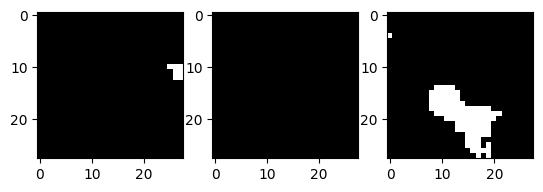

1094/1094 [==============================] - 3049s 3s/step - d_loss: 0.0067 - g_loss: 6.8798
Epoch 2/3
1094/1094 [==============================] - ETA: 0s - d_loss: 9.1062e-04 - g_loss: 8.8506

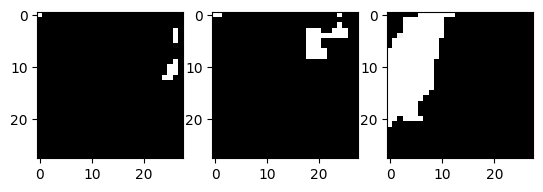

1094/1094 [==============================] - 3040s 3s/step - d_loss: 9.0999e-04 - g_loss: 8.8518
Epoch 3/3
 112/1094 [==>...........................] - ETA: 45:23 - d_loss: 3.9003e-04 - g_loss: 9.7166

KeyboardInterrupt: 

In [83]:
epochs=3

gan = Gan(discriminator=discriminator,generator=generator,latent_dim=latent_dim)
gan.compile(dis_opt = Adam(),gen_opt = Adam(),loss_funct=BinaryCrossentropy(from_logits=True))
gan.fit(
    dataset,
    epochs=epochs,
    callbacks=[GanMonitor(num_img=3, latent_dim=latent_dim)]
)

